<h2> es09: genetic algorithms<h2>

<img src="genetic comics.png">

The classes for the implementation of the genetic algorithm have been written in files exercices/lib/Genetic.cpp and exercices/include/Genetic.h . An encoding for permutations of the sequence 0 - 32 was used, (class  CodePerm). The class owns a vector of unsigned int which rappresents the order in which the cities (from number 1 onwards, 0-th city is always the first one in the sequence) occur in the path, and another one which is its encoding. The latter is ragarded to as the "genes", whereas the former is called "fenotype" and was initially expected to be a mere mirroring of "genes". The core functionalities are  the Translate() function (to compute "fenotype" from "genes") and TranslateBack (), for the opposite job, which was implemented later. 

The underlying idea is that of setting up a minimal encoding for the permutations of n elements. Since there are "only" $n!$ such sequences, we should look for a system with $n!$ possible states. Such a system is provided by a vector of unsigned int with the first one varying in range $[0, n-1]$, the second in range $[0, n-2]$ and so on up to the last (n-1th) one which only can be either 0 or 1. The meaning of such numbers can be defined computationally: if one simultaneously consumes an ordered sequence $1, 2, 3... n$ and a "genes" sequence, starting from the beginning, the first element in "genes" give the index of the element in the residual ordered  sequence to be removed from it and appended to the permutated sequence. An emulation of the algorithm is implemented below:


In [4]:
import numpy as np
def emulate_Trans(genes:list ):
    ordered = list(range(1, len (genes) + 2))
    genes.append(0)
    sequence = []
    print (ordered, sequence)
    for i, ind in enumerate(genes):
        if not type(ind) == int:
            raise TypeError ("type of genes elements must be int")
        if ind < 0 or ind > len(genes) - i - 1:
        
            raise ValueError ("ind value out of range")
        sequence.append (ordered.pop(ind))
        print ("residual: ", ordered, ", built sequence: ", sequence, ", added element at position ", ind)
            
    return sequence

            
#please insert here the genes you want to Translate()
print ("Translated sequence: ", emulate_Trans ([4,0,2,1]))

[1, 2, 3, 4, 5] []
residual:  [1, 2, 3, 4] , built sequence:  [5] , added element at position  4
residual:  [2, 3, 4] , built sequence:  [5, 1] , added element at position  0
residual:  [2, 3] , built sequence:  [5, 1, 4] , added element at position  2
residual:  [2] , built sequence:  [5, 1, 4, 3] , added element at position  1
residual:  [] , built sequence:  [5, 1, 4, 3, 2] , added element at position  0
Translated sequence:  [5, 1, 4, 3, 2]


This way, implementing crossover whithin problem bounds between chromosomes of the same size becomes straightforward, since it suffices to swap corresponding portions of either's "genes" member. On the other hand, implementing reasonable mutations modifying "genes" sequence, though the bounds being easily satisfied, becomes overwhelming hard, because no obvious match between a "genes" sequence modification and the corresponding change in the permutation exists.
Moreover, the encoded permutations are byased towards the full-ordered one, which corresponds to the genes sequence $0,0,0,0 ...$

That being so, for the mutation part, the classical mutations acting directly on the sequence have been implemented, and it was necessary to introduce the TranslateBack() function in CodePerm class to map them on the "genes" memeber. In conclusion, unless a theoretical work is done to study the way a change in such encoding affects the permutated sequence, the most efective approach seems to be mapping the problem candidate solutions to plain permutations, and only move to genes-like encoding before performing crossover. Off course, this has not been the approach of the present work

Now, to the results

In [5]:
import numpy as np
import matplotlib.pyplot as plt



In [6]:
dirname = "exercices/output/dir09"

filenames = ["circle_points.dat", "square_points.dat"]

# loading cities coordinates
coordinates = []
for filename in filenames: 
    coordinates.append (np.loadtxt (dirname + '/' + filename, max_rows = 2))
    


The choice of parents for creating the next generations is made by randomly selecting two indices inside a sorted CodePerm population, with an algorithm moreorless resembling:

\[index\]=int(pow((\[Rannyu()\]), 3)*\[population size\])

This way, sequences with lower cost (naerer to the top) are preferred. Next, it is given Crossover mutation the opportunity to happen; if it does not, the two parents pass into the next generation as they are.

Cities swap, cities range cyclic permutation and inversion were implemented as mutations (happening immediately after a new generation is created). All of them employ random generated parameters, plus an externally set value determining the probability for the mutation to happen. This way, there are 4 overall free parametrs, which shold be chosen carefully, as aexplained below:

First, the set of values for parameters p1, p2, p3, pCross  has been determined that allows one to achieve complete optimization for the circle problem. The algorithm was run in a loop through all combinations of p1, p2, p3, and pCross picked in the range \[0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875 \] (tot 4096 simulations). For each combination, the final length (after 100 generations) of the best path was saved, together with the parameters and the sequence of the cities. In the cell below only the paramters corresponding to a minimum length are selected and written to a file that will be  used later

In [7]:
#load sequences
#in order to find the best parameters for circle, change filenames[0] to "circle_fitness_parameters.dat"
filename = "circle_fitness_parameters3.dat"

best_lengths = []
sequences = []
bestindices = []
best_parameters = []


#print (filename)
tempdata = np.loadtxt (dirname + "/" + filename , skiprows=1)
#print (tempdata.shape)
best_lengths. append ((tempdata [:,4]).flatten())
#print (best_lengths)
sequences.append (tempdata [:,5:].astype ("int64"))
best_parameters.append (tempdata [:,:4])

bestindices.append (np.where (best_lengths[0] == np.min(best_lengths [0])))
#print (bestindices[ind])



    
for index_array, lengths, seq,  parameters in zip (bestindices, best_lengths, sequences, best_parameters):
    print (seq [index_array])
    #print (parameters [index_array])
    print (index_array)
    print ( "n of selected parameters ", np.array(index_array).shape[1])


#save to output file the probability paramteres that have proved best
with open (dirname + "/" + "tested_parameters.dat", "w") as outfile:
    for line in best_parameters [0] [bestindices[0]]:
        writestr = ' '.join(str (e) for e in line) + "\n"
        #print (writestr)
        outfile.write (writestr)
    

[[ 0 19 28 ... 13  7 12]
 [ 0 12  7 ...  4 28 19]
 [ 0 19 28 ... 13  7 12]
 ...
 [ 0 19 28 ... 13  7 12]
 [ 0 12  7 ...  4 28 19]
 [ 0 19 28 ... 13  7 12]]
(array([   4,    5,    6,   11,   13,   14,   20,   21,   22,   30,   69,
         70,   78,   94,  133,  134,  451,  452,  453,  454,  458,  459,
        460,  461,  462,  468,  469,  470,  474,  477,  478,  486,  517,
        518,  526,  534,  542,  581,  582,  589,  965,  966,  972,  973,
        974,  982,  990,  998, 1038, 1094, 1478, 1486, 1493, 3587, 3588,
       3589, 3590, 3595, 3596, 3597, 3598, 3605, 3606, 3613, 3614, 3622,
       3652, 3653, 3654, 3659, 3660, 3661, 3662, 3669, 3670, 3678, 3718,
       3725, 3734, 4035, 4037, 4038, 4043, 4044, 4045, 4046, 4052, 4053,
       4054, 4060, 4062, 4069, 4070, 4078], dtype=int64),)
n of selected parameters  94


secondly, the set of parameters  (94 4-uples) that proved best in solving the circle problem is used for generating a set of parameters input files for the solution of the square problem. Then, the 4-uple is chosen with which the best solution is achieved 

In [8]:
#load sequences

filename = "square_fitness_parameters3.dat"


#print (filename)
tempdata = np.loadtxt (dirname + "/" + filename , skiprows=1)
#print (tempdata.shape)
best_lengths. append ((tempdata [:,4]).flatten())
#print (best_lengths)
sequences.append (tempdata [:,5:].astype ("int64"))
best_parameters.append (tempdata [:,:4])

bestindices.append (np.where (best_lengths[-1] == np.min(best_lengths [-1])))
#print (bestindices[-1])



    

print (best_lengths [-1]  [bestindices [-1]])
print (parameters [index_array])
#print (bestindices [-1])
print ( "n of selected parameters ", np.array (bestindices [-1]).shape[1])
    
    
#print the algorithm paramteres used for generating the gaphs above
for paramArray, indices, name in zip (best_parameters, bestindices, ["circle",  "square"]):
    print (indices )
    print ("best parameters for " + name + ": " , paramArray [indices [0][0]] )

[4.70747 4.70747]
[[0.125 0.125 0.125 0.625]
 [0.125 0.125 0.125 0.75 ]
 [0.125 0.125 0.125 0.875]
 [0.125 0.125 0.25  0.5  ]
 [0.125 0.125 0.25  0.75 ]
 [0.125 0.125 0.25  0.875]
 [0.125 0.125 0.375 0.625]
 [0.125 0.125 0.375 0.75 ]
 [0.125 0.125 0.375 0.875]
 [0.125 0.125 0.5   0.875]
 [0.125 0.25  0.125 0.75 ]
 [0.125 0.25  0.125 0.875]
 [0.125 0.25  0.25  0.875]
 [0.125 0.25  0.5   0.875]
 [0.125 0.375 0.125 0.75 ]
 [0.125 0.375 0.125 0.875]
 [0.125 0.    0.125 0.5  ]
 [0.125 0.    0.125 0.625]
 [0.125 0.    0.125 0.75 ]
 [0.125 0.    0.125 0.875]
 [0.125 0.    0.25  0.375]
 [0.125 0.    0.25  0.5  ]
 [0.125 0.    0.25  0.625]
 [0.125 0.    0.25  0.75 ]
 [0.125 0.    0.25  0.875]
 [0.125 0.    0.375 0.625]
 [0.125 0.    0.375 0.75 ]
 [0.125 0.    0.375 0.875]
 [0.125 0.    0.5   0.375]
 [0.125 0.    0.5   0.75 ]
 [0.125 0.    0.5   0.875]
 [0.125 0.    0.625 0.875]
 [0.25  0.125 0.125 0.75 ]
 [0.25  0.125 0.125 0.875]
 [0.25  0.125 0.25  0.875]
 [0.25  0.125 0.375 0.875]
 [0.25  0.

now we can plot the best paths and the convergence of the best candidate length and mean of best half of population lengths towards the solution:

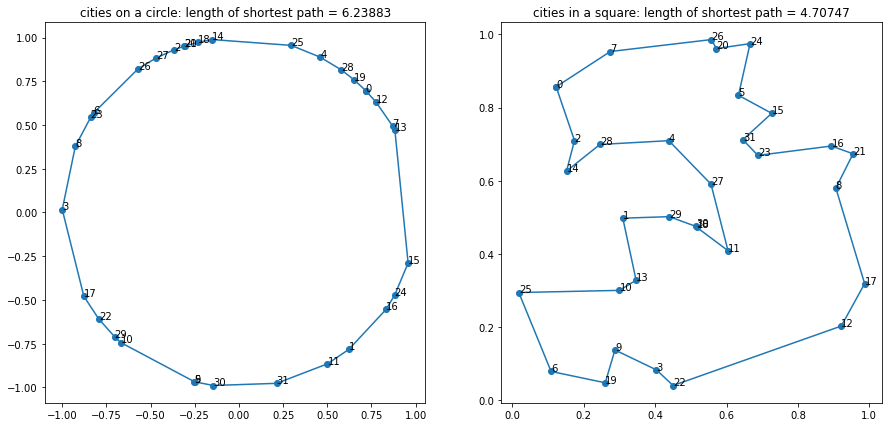

In [9]:
fig, axes = plt.subplots (1,2)
fig.set_size_inches (15,7)

for ax, coord, sequence, name , indices, lengths in zip (axes, coordinates, sequences, [" on a circle", " in a square"], bestindices, best_lengths):

    ind = indices [0][0]
    #assigning progressive number labels to cities
    x_s = coord [0]
    y_s = coord [1]

    for x, y, text in zip(x_s, y_s, range(x_s.shape[0])):
        ax.text(x, y, text)

    ax.plot (np.append (x_s [sequence [ind]], x_s [0]), np.append(y_s [sequence [ind]], y_s[0]),"-o")
    ax.set_title ("cities" + name + ": length of shortest path = " + str(lengths [ind]))




In [10]:
#load data again, this time in order to plot the convergence of mean "loss" estimators to the optimum
filenames = ["single_input/circle_progressive_fitness.dat", "single_input/square_progressive_fitness.dat"]

best_lengths = []
mean_lengths = []
for filename in filenames:
    tempdata = np.loadtxt (dirname + '/' + filename, skiprows=1, unpack=True)
    best_lengths.append (tempdata [1] )
    mean_lengths.append (tempdata [0] )

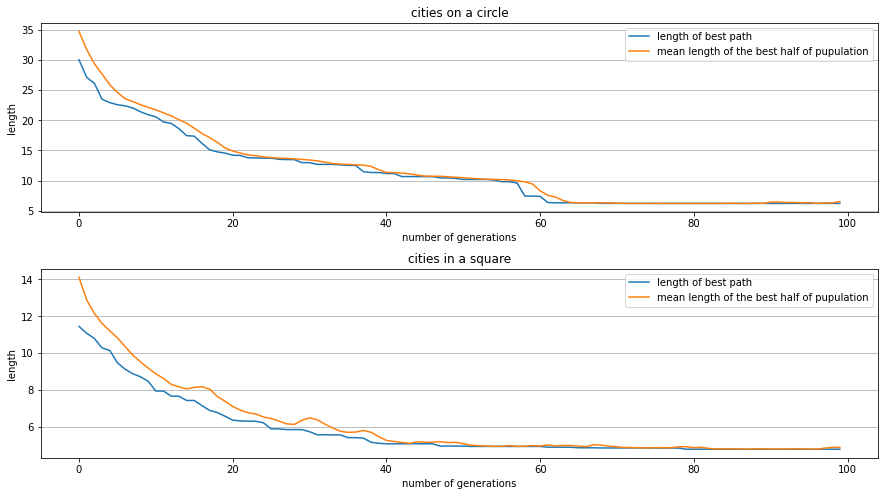

In [11]:
fig, axes = plt.subplots (2, 1)
fig.set_size_inches (15, 8)
plt.subplots_adjust (hspace = 0.3)

for ax, best, means, name in zip (axes, best_lengths, mean_lengths, ["on a circle", "in a square"]):
    x = range (best.shape[0])
    ax.plot (x, best, label="length of best path")
    ax.plot (x, means, label="mean length of the best half of pupulation")
    
    ax.set_title ("cities " + name)
    ax.set_xlabel ("number of generations")
    ax.set_ylabel ("length")
    ax.grid (axis="y", which="both")
    ax.legend()
    

A fixed number of generations was given the system to evolve. One can see that the convergence is so fast near optimum solutions actually start appearing at half the evolutionary time